# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Loading Data

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 15.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
366844,0.4980,0.0781,0.0269,0.0073,0.0122,0.0708,0.9546,0.5518,0.0024,0.4443,7,7,13,13
303107,0.0879,0.0024,0.0024,0.0024,0.0024,0.0293,0.6055,0.3345,0.0024,0.1245,0,0,0,0
208364,0.0269,0.0024,0.0049,0.0024,0.0024,0.0122,0.7104,0.1831,0.0024,0.1538,7,0,13,0
98310,1.0107,0.2319,0.4272,0.1099,0.0684,0.1465,0.5566,0.9302,0.1367,0.4297,7,7,12,12
469349,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0049,0.0024,0.0024,0.1245,0,0,0,0


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478193 entries, 0 to 478192
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          478193 non-null  float64
 1   Emg2          478193 non-null  float64
 2   Emg3          478193 non-null  float64
 3   Emg4          478193 non-null  float64
 4   Emg5          478193 non-null  float64
 5   Emg6          478193 non-null  float64
 6   Emg7          478193 non-null  float64
 7   Emg8          478193 non-null  float64
 8   Emg9          478193 non-null  float64
 9   Emg10         478193 non-null  float64
 10  repetition    478193 non-null  int64  
 11  rerepetition  478193 non-null  int64  
 12  stimulus      478193 non-null  int64  
 13  restimulus    478193 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 51.1 MB


In [4]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,478193.000000,478193.000000,478193.000000,478193.000000,478193.000000,478193.000000,478193.000000,478193.000000,478193.000000,478193.000000,478193.000000,478193.000000,478193.000000,478193.000000
mean,0.501572,0.151599,0.169478,0.056115,0.023732,0.065833,0.550883,0.589846,0.165808,0.288571,3.102268,2.235315,5.525838,4.065892
std,0.428903,0.262973,0.299034,0.130464,0.044097,0.111559,0.646651,0.384964,0.348622,0.376059,3.475910,3.261604,6.578251,6.221459
min,0.002400,0.000000,0.000000,0.000000,0.000000,0.000000,0.002400,0.002400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.217300,0.002400,0.002400,0.002400,0.002400,0.004900,0.124500,0.329600,0.002400,0.051300,0.000000,0.000000,0.000000,0.000000
50%,0.410200,0.036600,0.019500,0.002400,0.002400,0.024400,0.327100,0.485800,0.002400,0.136700,2.000000,0.000000,3.000000,0.000000
75%,0.649400,0.178200,0.214800,0.051300,0.022000,0.075700,0.727500,0.737300,0.183100,0.383300,6.000000,4.000000,10.000000,7.000000
max,4.663100,3.642600,4.658200,3.710900,0.874000,1.750500,4.663100,4.199200,4.658200,3.754900,10.000000,10.000000,23.000000,23.000000


In [5]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     207859
8      15597
7      15587
12     15585
4      15574
6      15559
9      15555
2      15554
5      15547
11     15531
10     15526
3      15520
1      15515
14     10404
13     10399
17     10398
15     10361
16     10323
19      5929
21      5198
18      5193
20      5161
22      5161
23      5157
Name: stimulus, dtype: int64


# Data Cleaning

In [6]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [7]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [8]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

# One Hot Encoding

In [9]:
num_classes = 24

In [10]:
# One hot encoding for categorical labels
import keras
from keras import utils as np_utils
y = keras.utils.np_utils.to_categorical(y, num_classes)

In [11]:
input_dim = X.shape[1]

# Standard Scaler

In [12]:
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()

In [13]:
sc = pd.DataFrame(standardscaler.fit_transform(X))

In [14]:
sc

,0,1,2,3,4,5,6,7,8,9
0,-0.490266,-0.612488,-0.618741,-0.457694,-0.534717,-0.605231,-0.791931,-0.887009,-0.520478,-0.799006
1,-0.409104,-0.595128,-0.610922,-0.457694,-0.534717,-0.605231,-0.781181,-0.724277,-0.520478,-0.768561
2,-0.387593,-0.595128,-0.603416,-0.457694,-0.481984,-0.605231,-0.784813,-0.615871,-0.520478,-0.744105
3,-0.447024,-0.612488,-0.618741,-0.457694,-0.534717,-0.605231,-0.795417,-0.615871,-0.520478,-0.750094
4,-0.533730,-0.612488,-0.618741,-0.457694,-0.534717,-0.605231,-0.809653,-0.658098,-0.520478,-0.750094
...,...,...,...,...,...,...,...,...,...,...
395226,-0.955951,-0.612488,-0.618741,-0.457694,-0.534717,-0.543540,-0.749367,-0.893182,-0.520478,-0.750094
395227,-0.988549,-0.612488,-0.618741,-0.457694,-0.534717,-0.564381,-0.767090,-0.941335,-0.520478,-0.756333
395228,-1.026247,-0.612488,-0.618741,-0.457694,-0.534717,-0.605231,-0.781181,-0.983562,-0.520478,-0.768561
395229,-1.015603,-0.612488,-0.618741,-0.457694,-0.534717,-0.605231,-0.777695,-0.953435,-0.520478,-0.762322


In [15]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(sc, y, test_size = 0.2, random_state = 39)

# Deep Learning 

In [16]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,ELU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import StratifiedKFold

In [17]:
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
from keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution1D, Dropout
from keras.initializers import random_uniform

# 1. Define Network

In [18]:
num_classes = 24
input_dim = X.shape[1]

In [19]:
visible = Input(shape=(input_dim,))
hidden1 = Dense(3000, activation='relu')(visible)
hidden2 = Dense(1500, activation='relu')(hidden1)
hidden3 = Dropout(0.2)(hidden2)
hidden4 = Dense(750, activation='relu')(hidden3)
hidden5 = Dense(375, activation='relu')(hidden4)
hidden6 = Dense(48, activation='relu')(hidden5)
output = Dense(num_classes, activation='softmax')(hidden6)
model = Model(inputs=visible, outputs=output)

In [20]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 3000)              33000     
                                                                 
 dense_1 (Dense)             (None, 1500)              4501500   
                                                                 
 dropout (Dropout)           (None, 1500)              0         
                                                                 
 dense_2 (Dense)             (None, 750)               1125750   
                                                                 
 dense_3 (Dense)             (None, 375)               281625    
                                                                 
 dense_4 (Dense)             (None, 48)                18048 

# 2. Compile Network

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
plot_model(model, 'EMG_ANN', show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


# 3. Fit Network

In [23]:
history = model.fit(X_train, y_train, batch_size=4056, epochs=100, validation_data = (X_test, y_test))

Epoch 1/100
78/78 [==============================] - 4s 29ms/step - loss: 1.4206 - accuracy: 0.6268 - val_loss: 1.0447 - val_accuracy: 0.7161
Epoch 2/100
78/78 [==============================] - 2s 25ms/step - loss: 0.9285 - accuracy: 0.7464 - val_loss: 0.8256 - val_accuracy: 0.7728
Epoch 3/100
78/78 [==============================] - 2s 25ms/step - loss: 0.7903 - accuracy: 0.7791 - val_loss: 0.7383 - val_accuracy: 0.7931
Epoch 4/100
78/78 [==============================] - 2s 25ms/step - loss: 0.7081 - accuracy: 0.7993 - val_loss: 0.6770 - val_accuracy: 0.8091
Epoch 5/100
78/78 [==============================] - 2s 25ms/step - loss: 0.6575 - accuracy: 0.8122 - val_loss: 0.6261 - val_accuracy: 0.8215
Epoch 6/100
78/78 [==============================] - 2s 25ms/step - loss: 0.6143 - accuracy: 0.8239 - val_loss: 0.5919 - val_accuracy: 0.8312
Epoch 7/100
78/78 [==============================] - 2s 25ms/step - loss: 0.5828 - accuracy: 0.8320 - val_loss: 0.5677 - val_accuracy: 0.8393
Epoch 

78/78 [==============================] - 2s 26ms/step - loss: 0.1563 - accuracy: 0.9522 - val_loss: 0.2197 - val_accuracy: 0.9369
Epoch 59/100
78/78 [==============================] - 2s 26ms/step - loss: 0.1554 - accuracy: 0.9526 - val_loss: 0.2168 - val_accuracy: 0.9381
Epoch 60/100
78/78 [==============================] - 2s 26ms/step - loss: 0.1507 - accuracy: 0.9545 - val_loss: 0.2091 - val_accuracy: 0.9404
Epoch 61/100
78/78 [==============================] - 2s 26ms/step - loss: 0.1486 - accuracy: 0.9545 - val_loss: 0.2217 - val_accuracy: 0.9372
Epoch 62/100
78/78 [==============================] - 2s 26ms/step - loss: 0.1509 - accuracy: 0.9540 - val_loss: 0.2136 - val_accuracy: 0.9390
Epoch 63/100
78/78 [==============================] - 2s 26ms/step - loss: 0.1448 - accuracy: 0.9556 - val_loss: 0.2150 - val_accuracy: 0.9393
Epoch 64/100
78/78 [==============================] - 2s 26ms/step - loss: 0.1412 - accuracy: 0.9568 - val_loss: 0.2118 - val_accuracy: 0.9408
Epoch 65/100

# 4.Evaluate Network

## 4.1. Plotting Loss and Accuracy

Text(0.5, 1.0, 'Loss Curve of Deep Neural Netowork')

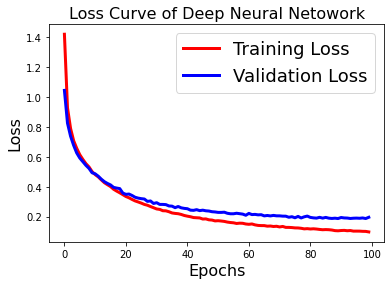

In [24]:
#Loss Curve


plt.plot(figsize = [8,6])

plt.plot(history.history['loss'],'r',linewidth = 3.0)
plt.plot(history.history['val_loss'],'b',linewidth = 3.0)

plt.legend(['Training Loss', 'Validation Loss'], fontsize = 18)

plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Loss', fontsize = 16)

plt.title('Loss Curve of Deep Neural Netowork' , fontsize = 16 )



Text(0.5, 1.0, 'Accuracy Curve of Deep Neural Netowork')

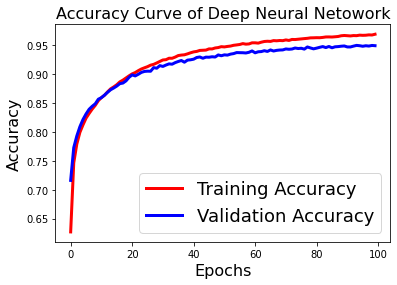

In [25]:
#Accuracy Curve

plt.plot(figsize = [8,6])
plt.plot(history.history['accuracy'],'r',linewidth = 3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth = 3.0)

plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize = 18)

plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Accuracy', fontsize = 16)


plt.title('Accuracy Curve of Deep Neural Netowork' , fontsize = 16 )

##  4.2 Make Predictions

In [26]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis = 1)

In [27]:
predictions

array([ 3,  0,  0, ...,  1,  0, 19], dtype=int64)

#### Transforming from One Hot Encoding

In [28]:
y_test =np.argmax(y_test, axis=1)
y_test[1]

0

In [29]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, predictions)}
print(f"Accuracy is: {accuracy_score(y_test, predictions)* 100}")

Accuracy is: 94.95237010892254


## 4.3 Classification Report

Classification report : 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     40780
           1       0.96      0.93      0.95      2304
           2       0.90      0.88      0.89      1970
           3       0.96      0.91      0.94      2146
           4       0.95      0.90      0.92      2172
           5       0.96      0.89      0.92      1921
           6       0.96      0.94      0.95      1967
           7       0.92      0.89      0.91      2377
           8       0.96      0.88      0.92      2261
           9       0.93      0.89      0.91      2141
          10       0.95      0.92      0.94      2305
          11       0.95      0.93      0.94      2182
          12       0.94      0.92      0.93      2233
          13       0.94      0.92      0.93      1299
          14       0.95      0.89      0.92      1612
          15       0.90      0.91      0.91      1578
          16       0.95      0.91      0.93      1547
 

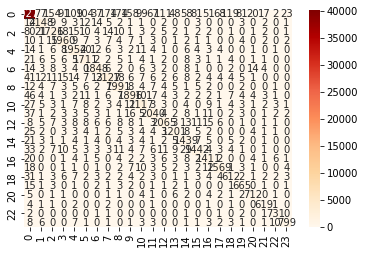

In [30]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, predictions))

cm = confusion_matrix(predictions, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

## 4.4 Evaluation

In [31]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.4067200526269182
MSE: 4.863157362075727
RMSE: 2.2052567564970134


In [32]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, predictions, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, predictions,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, predictions,average='weighted'))

Precision Score :  0.9493879509443125
Recall Score :  0.9495237010892253
f1_score :  0.949069446321425
